<a href="https://colab.research.google.com/github/Ahad4200/ML-LABS/blob/main/ML_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Density-based clustering is a powerful technique in unsupervised learning that groups data points based on their density in a given space. Unlike traditional clustering methods like K-Means, which assume clusters are spherical, density-based clustering can identify clusters of arbitrary shapes and effectively handle noise and outliers.

### **DBSCAN Algorithm**
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is one of the most widely used density-based clustering algorithms. It works by defining clusters as dense regions separated by areas of lower density.

#### **Key Concepts in DBSCAN**
- **Core Points**: Points that have at least a minimum number of neighboring points (MinPts) within a specified radius (ε).
- **Border Points**: Points that are within the ε distance of a core point but do not have enough neighboring points to be core points themselves.
- **Noise Points**: Points that are neither core nor border points and do not belong to any cluster.

#### **Steps in DBSCAN Algorithm**
1. Select an unvisited point and check if it is a core point.
2. If the point is a core point, expand the cluster by adding all reachable points within ε.
3. Mark the visited points and continue until all points are processed.
4. Points that are not part of any cluster are labeled as noise.

### **Advantages of DBSCAN**
- **Handles Arbitrary-Shaped Clusters**: Unlike K-Means, DBSCAN does not assume clusters are spherical.
- **No Need to Predefine Number of Clusters**: DBSCAN automatically determines the number of clusters based on density.
- **Effectively Identifies Noise and Outliers**: Points that do not belong to any cluster are labeled as noise.

### **Implementation in Python**
You can implement DBSCAN using the `sklearn` library. Here's a basic example:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate synthetic dataset
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Visualize results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering")
plt.show()
```

### **Silhouette Score for Evaluation**
The **Silhouette Score** is a metric used to evaluate clustering performance. It measures how well-separated clusters are and how cohesive they remain.

```python
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels)
print(f"Silhouette Score: {score}")
```



#TASK 1

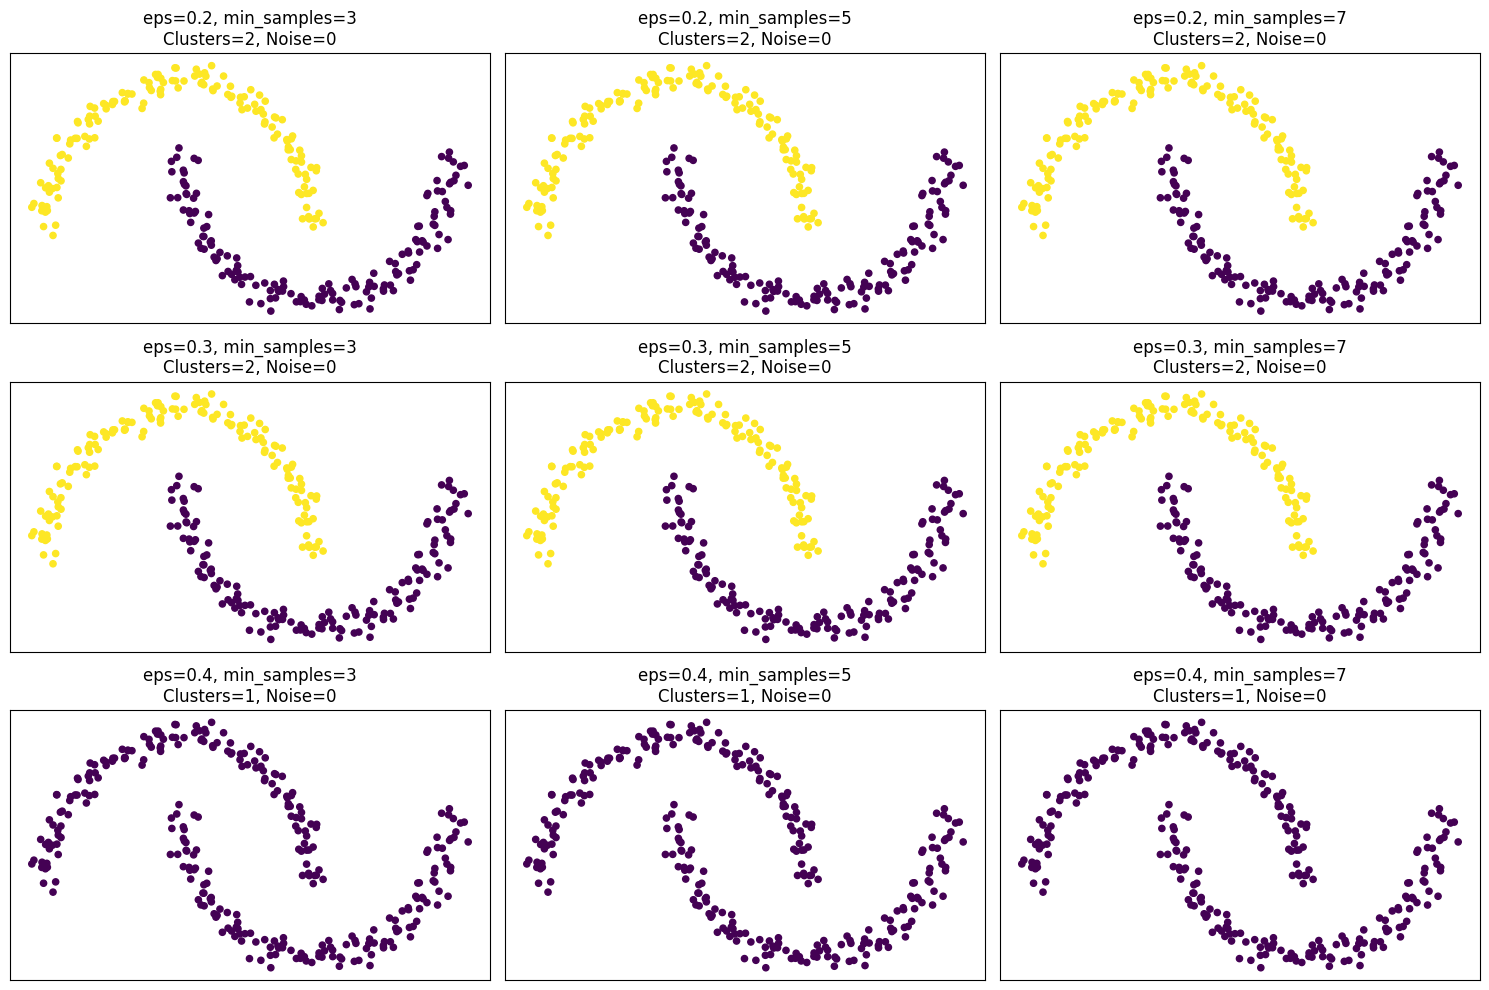

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate dataset
X1, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Define parameter grids
eps_values = [0.2, 0.3, 0.4]
min_samples_values = [3, 5, 7]

# Plot setup
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 10))

# Iterate through each combination
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X1)

        # Count clusters and noise
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        # Plotting
        ax = axes[i, j]
        ax.scatter(X1[:, 0], X1[:, 1], c=labels, cmap='viridis', s=20)
        ax.set_title(f'eps={eps}, min_samples={min_samples}\nClusters={n_clusters}, Noise={n_noise}')
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()

#TASK 2

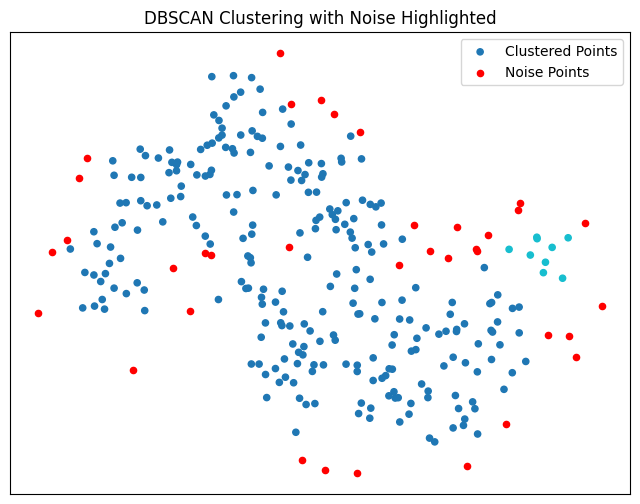

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate dataset with higher noise
X2, _ = make_moons(n_samples=300, noise=0.2, random_state=42)

# Apply DBSCAN with strict parameters
db = DBSCAN(eps=0.2, min_samples=7)
labels = db.fit_predict(X2)

# Identify noise points
noise_mask = labels == -1
core_mask = labels != -1

# Plotting clusters and noise separately
plt.figure(figsize=(8, 6))
plt.scatter(X2[core_mask, 0], X2[core_mask, 1], c=labels[core_mask], cmap='tab10', s=20, label='Clustered Points')
plt.scatter(X2[noise_mask, 0], X2[noise_mask, 1], c='red', s=20, label='Noise Points')
plt.title("DBSCAN Clustering with Noise Highlighted")
plt.legend()
plt.xticks([])
plt.yticks([])
plt.show()

#TASK 3

Silhouette Score: 0.292


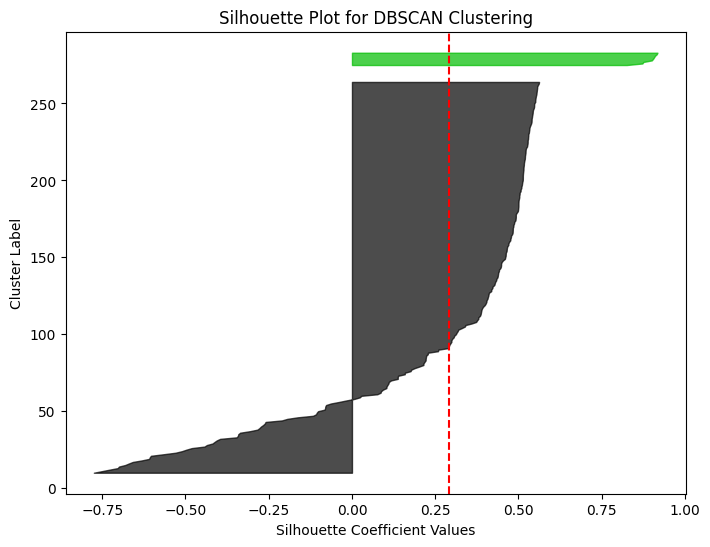

In [3]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

# Only compute score if at least 2 clusters
if len(set(labels)) - (1 if -1 in labels else 0) > 1:
    sil_score = silhouette_score(X2[core_mask], labels[core_mask])
    print(f"Silhouette Score: {sil_score:.3f}")

    # Silhouette plot
    sample_silhouette_values = silhouette_samples(X2[core_mask], labels[core_mask])
    y_lower = 10
    plt.figure(figsize=(8, 6))
    for i in np.unique(labels[core_mask]):
        ith_cluster_silhouette_values = sample_silhouette_values[labels[core_mask] == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / len(np.unique(labels[core_mask])))
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10

    plt.axvline(x=sil_score, color="red", linestyle="--")
    plt.title("Silhouette Plot for DBSCAN Clustering")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster Label")
    plt.show()
else:
    print("Silhouette Score is not meaningful with less than 2 clusters.")

#POST LAB TASK

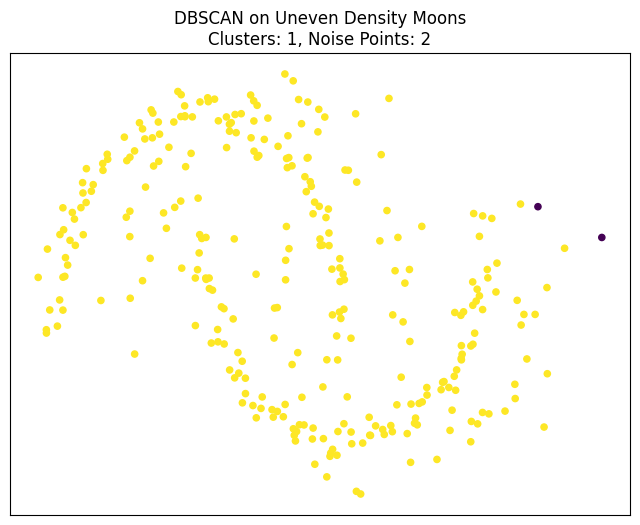

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
# Create custom moons with uneven densities
X_dense, _ = make_moons(n_samples=200, noise=0.05, random_state=42)
X_sparse, _ = make_moons(n_samples=100, noise=0.15, random_state=24)

# Shift the sparse moon to simulate different factor (distance)
X_sparse[:, 0] += 0.5

# Combine the datasets to form uneven density moons
X_combined = np.vstack((X_dense, X_sparse))

# Apply DBSCAN
db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X_combined)

# Count clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=labels, cmap='viridis', s=20)
plt.title(f'DBSCAN on Uneven Density Moons\nClusters: {n_clusters}, Noise Points: {n_noise}')
plt.xticks([])
plt.yticks([])
plt.show()